# Wine Quality Prediction

- Data Source : http://archive.ics.uci.edu/ml/datasets/Wine+Quality
- Relevant Paper : https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub

- Terdapat dua data (white wine & red wine) yang akan dipakai keduanya.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

- white untuk dataset white wine 
- red untuk dataset red wine

In [2]:
white = pd.read_csv('winequality-white.csv', sep= ';')
red = pd.read_csv('winequality-red.csv', sep= ';')

- membuat kolom type, white untuk white wine, dan red untuk red wine

In [3]:
white['type'] = 'white'
red['type'] = 'red'

In [4]:
df = pd.concat([white, red])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


- mengubah posisi kolom type pada urutan pertama

- save df ke csv

In [5]:
df = df[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

df.to_csv('winequality_white&red.csv', index= False)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EDA (Exploratory Data Analysis)

Info :

- Fixed Acidity: adalah asam non-volatil yang tidak mudah menguap

- Volatile Acidity: adalah asam asetat tinggi dalam anggur yang menyebabkan rasa cuka yang tidak enak

- Citric Acid: bertindak sebagai pengawet untuk meningkatkan keasaman (jumlah kecil menambah kesegaran dan rasa pada anggur)

- Residual Sugar: adalah jumlah gula yang tersisa setelah fermentasi dihentikan. Kuncinya adalah memiliki keseimbangan sempurna antara manis dan asam (anggur > 45g / ltr rasanya manis)

- Chlorides: jumlah garam dalam anggur

- Free Sulfur Dioxide: mencegah pertumbuhan mikroba dan oksidasi anggur

- Total Sulfur Dioxide: adalah jumlah SO2 yang terikat + bebas

- Density: anggur yang lebih manis memiliki kepadatan yang lebih tinggi

- pH: tingkat keasaman

- Sulphates: aditif anggur yang berkontribusi pada tingkat SO2 dan bertindak sebagai antimikroba dan antioksidan

- Alcohol: Jumlah alkohol dalam anggur

# - Wine Data Distribution

# Distribusi Data Tidak Normal 

skewness :
- fixed acidity : 1.7228917553916054
- volatile acidity : 1.4947513386353362
- citric acid : 0.47162175431208403
- residual sugar : 1.43507284144184
- chlorides : 5.398580962521254
- free sulfur dioxide : 1.219784372282318
- total sulfur dioxide : -0.001177206365785478
- density : 0.5034854532378842
- pH : 0.3867494806198059
- sulphates : 1.796855031034402
- alcohol : 0.5655871101943124
- quality : 0.18957891127582205

nilai negatif untuk kemiringan menunjukkan data yang miring ke kiri dan nilai positif untuk kemiringan menunjukkan data yang miring ke kanan. 

yang dimaksud dengan miring ke kiri adalah bahwa ekor kiri relatif panjang dibandingkan dengan ekor kanan. Demikian pula, miring ke kanan berarti ekor kanan relatif panjang dibandingkan dengan ekor kiri.

sedangkan pada quality adalah categorical yang menunjukkan tingkat wine quality dari 3 - 9

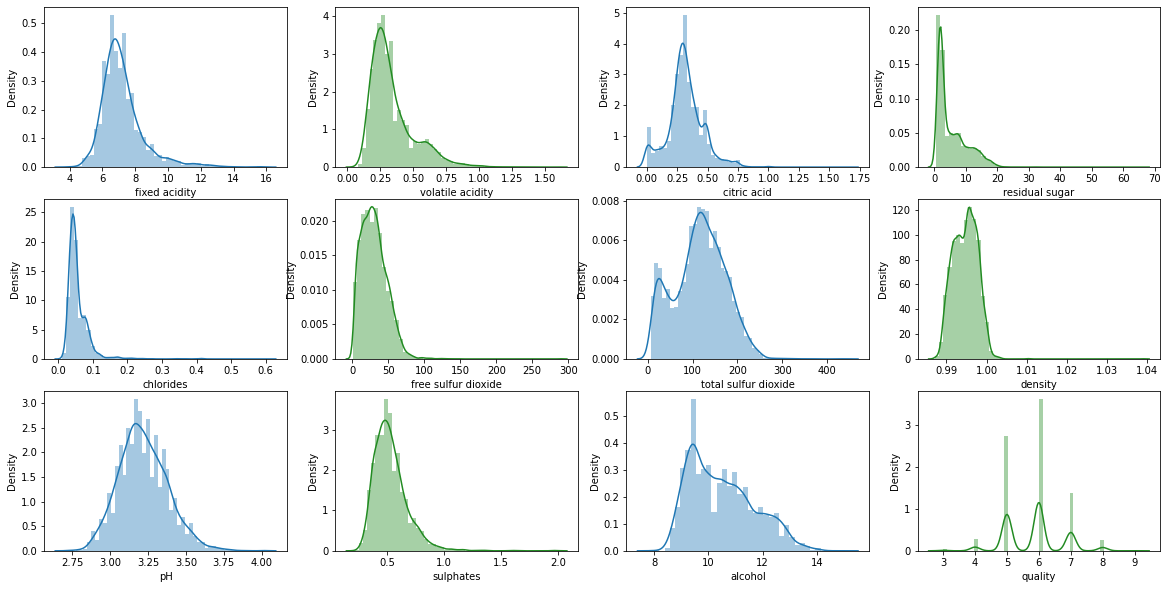

In [6]:
f, axes = plt.subplots(3, 4, figsize=(20, 10))

sns.distplot(df['fixed acidity'], ax= axes[0, 0])
sns.distplot(df['volatile acidity'], color= 'forestgreen', ax= axes[0, 1])
sns.distplot(df['citric acid'], ax= axes[0, 2])
sns.distplot(df['residual sugar'], color= 'forestgreen', ax= axes[0, 3])

sns.distplot(df['chlorides'], ax= axes[1, 0])
sns.distplot(df['free sulfur dioxide'], color= 'forestgreen', ax= axes[1, 1])
sns.distplot(df['total sulfur dioxide'], ax= axes[1, 2])
sns.distplot(df['density'], color= 'forestgreen', ax= axes[1, 3])

sns.distplot(df['pH'], ax= axes[2, 0])
sns.distplot(df['sulphates'], color= 'forestgreen', ax= axes[2, 1])
sns.distplot(df['alcohol'], ax= axes[2, 2])
sns.distplot(df['quality'], color= 'forestgreen', ax= axes[2, 3])

plt.savefig('fp_wine1.jpg')

In [7]:
from scipy.stats import stats

print('fixed acidity :', stats.skew(df['fixed acidity']))
print('volatile acidity :', stats.skew(df['volatile acidity']))
print('citric acid :', stats.skew(df['citric acid']))
print('residual sugar :', stats.skew(df['residual sugar']))
print('chlorides :', stats.skew(df['chlorides']))
print('free sulfur dioxide :', stats.skew(df['free sulfur dioxide']))
print('total sulfur dioxide :', stats.skew(df['total sulfur dioxide']))
print('density :', stats.skew(df['density']))
print('pH :', stats.skew(df['pH']))
print('sulphates :', stats.skew(df['sulphates']))
print('alcohol :', stats.skew(df['alcohol']))
print('quality :', stats.skew(df['quality']))

fixed acidity : 1.7228917553916054
volatile acidity : 1.4947513386353362
citric acid : 0.47162175431208403
residual sugar : 1.43507284144184
chlorides : 5.398580962521254
free sulfur dioxide : 1.219784372282318
total sulfur dioxide : -0.001177206365785478
density : 0.5034854532378842
pH : 0.3867494806198059
sulphates : 1.796855031034402
alcohol : 0.5655871101943124
quality : 0.18957891127582205


# - Lebih banyak white wine dibanding red wine pada dataset
- white wine : 75.38 %
- red wine : 24.61 %

white    75.388641
red      24.611359
Name: type, dtype: float64


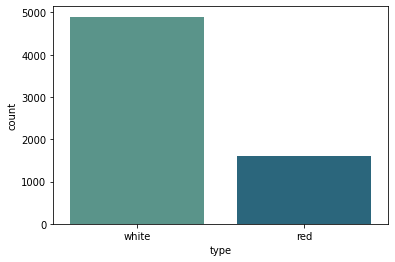

In [8]:
sns.countplot(df['type'], palette= 'crest')
print(df['type'].value_counts(normalize= True) * 100)

# - Tingkat kualitas wine terbanyak 
6   : 43.65%

5   : 32.90%

7   : 16.60%

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64


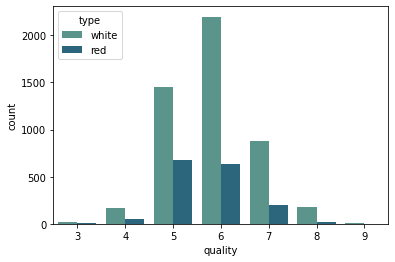

In [9]:
sns.countplot(df['quality'], hue= df['type'], palette= 'crest')
print(df['quality'].value_counts(normalize= True) * 100)

plt.savefig('fp_wine2.jpg')

# - Tingkat asam non-volatil yang tidak mudah menguap
asam non volatil tertinggi ada pada kualitas wine 3

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

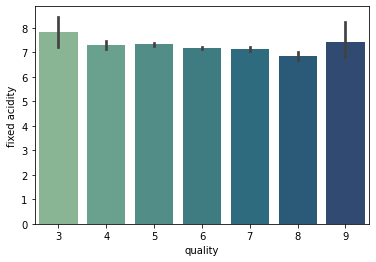

In [13]:
sns.barplot(df['quality'], df['fixed acidity'], palette= 'crest')

# - Tingkat asam asetat tinggi dalam anggur yang menyebabkan rasa cuka yang tidak enak
asam asetat tertinggi ada pada wine dengan kualitas 3

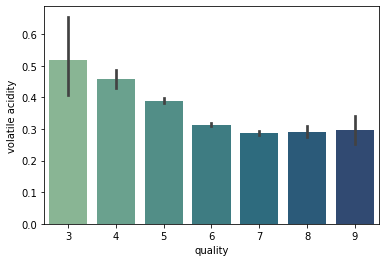

In [14]:
sns.barplot(df['quality'], df['volatile acidity'], palette= 'crest')

plt.savefig('fp_wine3.jpg')

# - Tingkat pengawet untuk meningkatkan keasaman (jumlah kecil menambah kesegaran dan rasa pada anggur)
kadar pengawet untuk meningkatkan keasaman tertinggi ada pada wine dengan kualitas 9

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

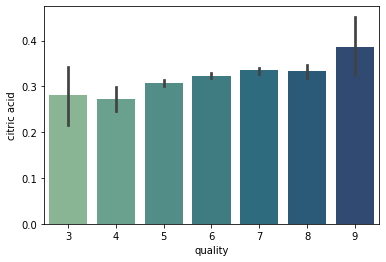

In [15]:
sns.barplot(df['quality'], df['citric acid'], palette= 'crest')

# - Tingkat jumlah gula yang tersisa setelah fermentasi dihentikan
kadar jumlah gula tersisa terbanyak ada pada wine dengan kualitas 5

tingkat residual sugar pada wine di dataset adalah dari 0.6 - 65.8 gram

anggur dengan kadar jumlah gula tersisa > 45g / ltr rasanya manis

anggur pada kualitas 4 dan 9 memiliki jumlah kadar gula di bawah 45g, rata2 anggur pada kualitas wine 4 dan 9 cenderung lebih asam

0.6 - 65.8


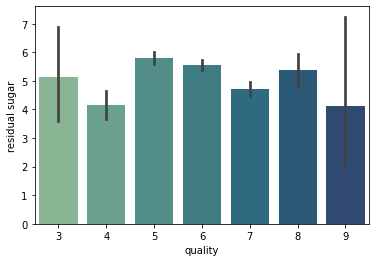

In [16]:
sns.barplot(df['quality'], df['residual sugar'], palette= 'crest')
print(df['residual sugar'].min(), '-', df['residual sugar'].max())

# - Tingkat jumlah garam dalam anggur
jumlah garam dalam anggur tertinggi ada pada wine dengan kualitas 3, dan cenderung terus menurun hingga kualitas wine tertinggi

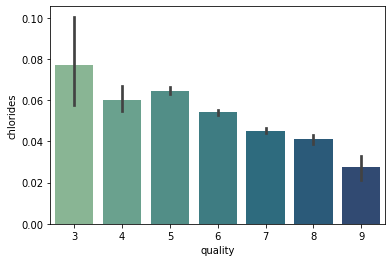

In [17]:
sns.barplot(df['quality'], df['chlorides'], palette= 'crest')

plt.savefig('fp_wine4.jpg')

# - Tingkat kandungan yang mencegah pertumbuhan mikroba dan oksidasi anggur
wine dengan kualitas wine 3 memiliki tingkat kandungan free sulfur dioxide tertinggi

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

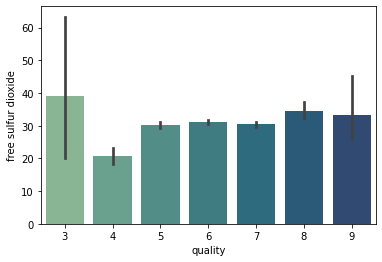

In [18]:
sns.barplot(df['quality'], df['free sulfur dioxide'], palette= 'crest')

# - Tingkat jumlah SO2 yang terikat + bebas
tingkat kadar jumlah SO2 terendah ada pada wine dengan kualitas 4, dan sisanya cenderung lebih tinggi 

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

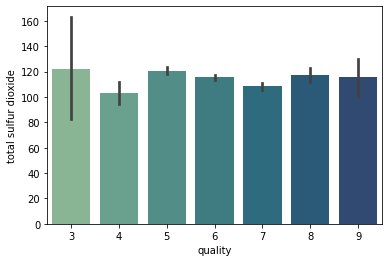

In [19]:
sns.barplot(df['quality'], df['total sulfur dioxide'], palette= 'crest')

# - Tingkat kepadatan anggur
kepadatan anggur tertinggi ada pada wine dengan kualitas 6, dan sisanya cenderung sama

anggur yang lebih manis memiliki kepadatan yang lebih tinggi

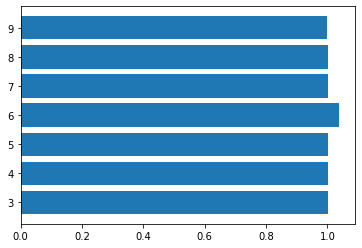

In [20]:
plt.barh(df['quality'], df['density'])

plt.savefig('fp_wine5.jpg')

# - Tingkat kadar pH (mempengaruhi keasaman anggur)
kadar pH cenderung hampir sama, namun pada wine dengan kualitas 9 cenderung lebih tinggi sedikit

<AxesSubplot:xlabel='quality', ylabel='pH'>

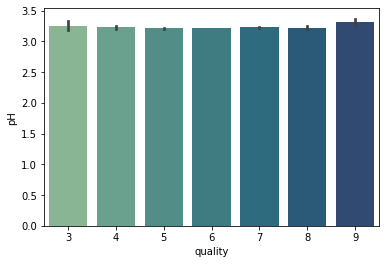

In [21]:
sns.barplot(df['quality'], df['pH'], palette= 'crest')

# - Tingkat sulphates (zat aditif anggur yang berkontribusi pada tingkat SO2 dan bertindak sebagai antimikroba dan antioksidan)
kadar sulphates pada wine dengan kualitas 7 cenderung lebih tinggi sedikit dibandingkan dengan yang lainnya

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

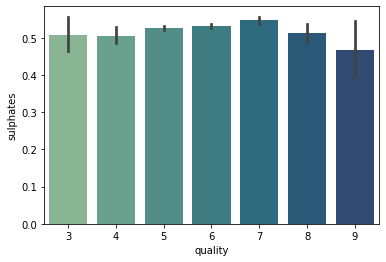

In [22]:
sns.barplot(df['quality'], df['sulphates'], palette= 'crest')

# - Tingkat jumlah kadar alkohol dalam wine
kadar alkohol tertinggi ada pada wine dengan kualitas 9, dari wine dengan kualitas 6 kadar alkohol cenderung terus naik hingga kualitas 9

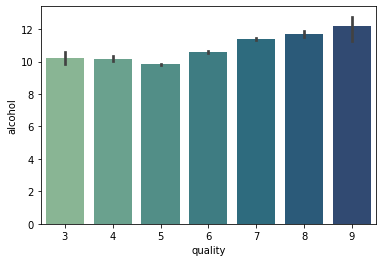

In [23]:
sns.barplot(df['quality'], df['alcohol'], palette= 'crest')

plt.savefig('fp_wine6.jpg')

# - Heatmap Correlation
method= 'spearman' karena distribusi data tidak normal

feature yang akan digunakan : [alcohol, density, chlorides, volatile acidity]

karena [alcohol] memiliki hubungan korelasi positif terhadap quality, sedangkan [density chlorides dan volatile acidity] memiliki hubungan korelasi negatif terhadap quality

walaupun hubungan korelasi tergolong lemah (> 0.2) tetapi berpengaruh pada wine quality

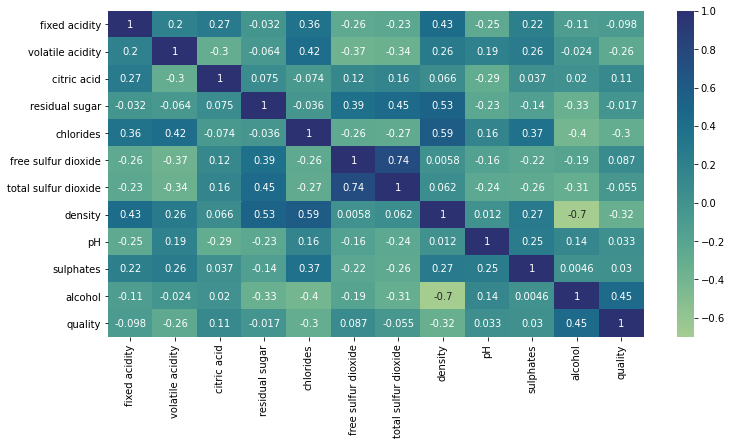

In [24]:
plt.figure(figsize= (12, 6))
sns.heatmap(df.corr(method= 'spearman'), annot= True, cmap= 'crest')

plt.savefig('fp_wine7.jpg')

- Karena median dari wine quality adalah 6, maka akan dibuat kolom baru dengan nama score untuk sebagai target data 

df score = 1 apabila quality > 6, dan 0 apabila quality < 6

In [35]:
df['quality'].median()

6.0

In [50]:
df['score'] = [1 if i > 6 else 0 for i in df['quality']]

# - Persentase wine yang masuk kategori 'good' dan 'bad'
0 (bad) : 80.34%

1 (good) : 19.65%

In [51]:
df['score'].value_counts(normalize= True) * 100

0    80.344775
1    19.655225
Name: score, dtype: float64

# Penjelasan tentang insight yang ditemukan dari hasil Exploratory Data Analysis:

- Tingkat kualitas wine terbanyak adalah wine dengan kualitas 6

- Kadar asam asetat tertinggi ada pada wine dengan kualitas terendah / 3

> asam asetat yang tinggi dalam anggur menyebabkan rasa cuka yang tidak enak

- Kadar citric acid(pengawet untuk meningkatkan keasaman) tertinggi ada pada wine dengan kualitas tertinggi / 9

> karena wine dengan kualitas 9 memiliki kandungan alkohol tertinggi, mungkin kandungan citric acid dalam wine kualitas 9 dapat menjadi jumlah kecil yang dapat menambah kesegaran dan rasa pada anggur

- Jumlah garam dalam anggur tertinggi ada pada wine dengan kualitas terendah / 3

- Kepadatan anggur tertinggi ada pada wine dengan kualitas 6 

> anggur yang lebih manis memiliki kepadatan yang lebih tinggi, wine dengan kualitas 6 adalah jumlah anggur terbanyak

# Conclusion : 

- Tinggi rendahnya Kandungan alcohol, density, chlorides, dan volatile acidity terlihat paling mempengaruhi kualitas dari wine.

> Pada umumnya alcohol pada wine berkisar dari 5% - 15%. Kadar alkohol cenderung terus naik dari wine dengan kualitas 6 hingga kualitas 9. Karena alkohol adalah produk fermentasi, semakin matang anggur pada saat ragi mengubah gula anggur menjadi alkohol, semakin tinggi kemungkinan kadar alkoholnya.

- Wine dengan density(kepadatan anggur) tertinggi ada pada wine terbanyak / wine dengan kualitas 6.

> Kepadatan anggur adalah persentase kandungan alkohol dan gula terhadap air. Anggur yang lebih manis cenderung memiliki kepadatan yang lebih tinggi.
 
- Jumlah chlorides(garam dalam anggur) tertinggi ada pada wine dengan kualitas 3 / terendah, dan cenderung terus menurun hingga kualitas wine tertinggi.

> Semakin rendah garam dalam anggur, semakin bagus kualitas wine tersebut, karena garam yang terlalu tinggi dapat menurunkan rasa gurih dari wine.

- Jumlah volatile acidity(asam asetat) tertinggi ada pada wine dengan kualitas 3 / terendah.

> Kadar asam asetat yang tinggi dalam anggur menyebabkan rasa cuka yang tidak enak.

# - Check if there are any Missing Value for Data Cleaning 
- Tidak ada missing value / null value 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  score                 6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 890.4+ KB


In [53]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
score                   0
dtype: int64

# - Data Preprocessing, Model Benchmark & Evaluation Metrics

Target data :
[score] 

tujuan dari prediksi adalah untuk mengetahui good wine dari kebanyakan bad wine

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df[['alcohol', 'density', 'chlorides', 'volatile acidity']]
y = df['score']

- split data untuk train dan test, 80% data untuk train dan 20% data untuk test

random_state= 2021 (Mengontrol pengacakan yang diterapkan ke data sebelum menerapkan pemisahan dan akan diterapkan ke semua model dengan pengacakan yang sama.)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.2, random_state= 2021)
X_train

,alcohol,density,chlorides,volatile acidity
1264,11.8,0.99456,0.066,0.37
1243,13.5,0.98960,0.041,0.44
722,11.7,0.99170,0.032,0.31
1988,9.5,0.99700,0.043,0.22
2904,10.8,0.99114,0.034,0.25
...,...,...,...,...
3035,11.3,0.99014,0.026,0.24
1689,11.4,0.99150,0.034,0.16
1041,9.8,0.99547,0.079,0.49
970,10.9,0.99724,0.066,0.26


# - Random Under Sampling & Random Over Sampling
karena data yang mau diprediksi tidak balance, akan dicoba dengan methode sampling untuk model benchmark untuk mengetahui apakah ada peningkatan performa model.

0 (bad) : 80.34%

1 (good) : 19.65%

RandomOverSampler : menduplikasi contoh dari kelas minoritas dalam set data pelatihan dan dapat mengakibatkan overfitting untuk beberapa model.

RandomUnderSampler : menghapus contoh dari kelas mayoritas dan dapat mengakibatkan hilangnya informasi yang sangat berharga bagi model.

In [59]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [60]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train, y_train)

ros = RandomOverSampler()
X_over, y_over = ros.fit_resample(X_train, y_train)

# - Model yang dipilih untuk prediksi adalah model Classifier
karena target dari model prediksi adalah klasifikasi untuk mengetahui good wine dan bad wine 

cara kerja model

- Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) dengan probabilitas hasil output diskrit tertentu.

- Decision Tree Classifier adalah suatu metode klasifikasi yang menggunakan struktur pohon, dimana setiap node merepresentasikan atribut dan cabangnya merepresentasikan nilai dari atribut, sedangkan daunnya digunakan untuk merepresentasikan kelas. 

- Random Forest Classifier adalah suatu algoritma yang digunakan pada klasifikasi data dalam jumlah yang besar. Klasifikasi random forest dilakukan melalui penggabungan pohon (tree) dengan melakukan training pada sampel data yang dimiliki. Penentuan klasifikasi dengan random forest diambil berdasarkan hasil voting dari tree yang terbentuk.

- K-Nearest Neighbor adalah algoritma supervised  learning dimana hasil dari instance yang baru diklasifikasikan berdasarkan mayoritas dari kategori k-tetangga terdekat.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from imblearn.pipeline import Pipeline

In [62]:
models = [
    ['Logistic Regression', LogisticRegression()],
    ['Decission Tree Classifier', DecisionTreeClassifier()],
    ['Random Forest Classifier', RandomForestClassifier()],
    ['KNeighbors Classifier', KNeighborsClassifier()]
]

# - Model Benchmark 
Metrics yang dipakai adalah "precision" 

karena fokus dari prediksi adalah untuk memprediksi wine dengan kualitas good quality. 

Dengan menggunakan precision score, akan meminimalkan jumlah false positive yang terprediksi sebagai good wine. karena fokus dari precision score adalah meminimalkan jumlah false positive.

# - Model Benchmark Without Sampler (Default)

In [63]:
def evaluate(models):
    model_name = []
    precision_score = []
    precision_std = []

    for name, model in models:
        estimator = Pipeline([
            ('model', model)
            ])
        
        skfold = StratifiedKFold(n_splits= 5)

        model_name.append(name)
        precision_score.append(cross_val_score(estimator, X_train, y_train, cv= skfold, scoring= 'precision').mean())
        precision_std.append(cross_val_score(estimator, X_train, y_train, cv= skfold, scoring= 'precision').std())

    return pd.DataFrame({'Model' : model_name, 'Precision_Score' : precision_score, 'Precision_Std' : precision_std})

In [64]:
evaluate(models).sort_values(by= 'Precision_Score', ascending= False)

,Model,Precision_Score,Precision_Std
2,Random Forest Classifier,0.691140,0.037319
0,Logistic Regression,0.543185,0.062908
1,Decission Tree Classifier,0.523771,0.014584
3,KNeighbors Classifier,0.515786,0.037503


# - Model Benchmark With Under Sampler

In [65]:
def evaluate(models):
    model_name = []
    precision_score = []
    precision_std = []

    for name, model in models:
        estimator = Pipeline([
            ('model', model)
            ])
        
        skfold = StratifiedKFold(n_splits= 5)

        model_name.append(name)
        precision_score.append(cross_val_score(estimator, X_under, y_under, cv= skfold, scoring= 'precision').mean())
        precision_std.append(cross_val_score(estimator, X_under, y_under, cv= skfold, scoring= 'precision').std())

    return pd.DataFrame({'Model' : model_name, 'Precision_Score' : precision_score, 'Precision_Std' : precision_std})

In [66]:
evaluate(models).sort_values(by= 'Precision_Score', ascending= False)

,Model,Precision_Score,Precision_Std
2,Random Forest Classifier,0.773116,0.009655
0,Logistic Regression,0.729475,0.036252
1,Decission Tree Classifier,0.718890,0.020335
3,KNeighbors Classifier,0.710955,0.022150


# - Model Benchmark With Over Sampler

In [67]:
def evaluate(models):
    model_name = []
    precision_score = []
    precision_std = []

    for name, model in models:
        estimator = Pipeline([
            ('model', model)
            ])
        
        skfold = StratifiedKFold(n_splits= 5)

        model_name.append(name)
        precision_score.append(cross_val_score(estimator, X_over, y_over, cv= skfold, scoring= 'precision').mean())
        precision_std.append(cross_val_score(estimator, X_over, y_over, cv= skfold, scoring= 'precision').std())

    return pd.DataFrame({'Model' : model_name, 'Precision_Score' : precision_score, 'Precision_Std' : precision_std})

In [68]:
evaluate(models).sort_values(by= 'Precision_Score', ascending= False)

,Model,Precision_Score,Precision_Std
2,Random Forest Classifier,0.907396,0.004742
1,Decission Tree Classifier,0.884846,0.008891
3,KNeighbors Classifier,0.772966,0.010599
0,Logistic Regression,0.715800,0.013758


# - Compare all Model Benchmark with Best Model :
Best Model : Random Forest Classifier

- default (without sampler)

In [70]:
estimator = Pipeline([
    ('model', RandomForestClassifier())
])

estimator.fit(X_train, y_train)
y_pred_forest = estimator.predict(X_test)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1044
           1       0.71      0.57      0.64       256

    accuracy                           0.87      1300
   macro avg       0.81      0.76      0.78      1300
weighted avg       0.86      0.87      0.87      1300



- under sampler

In [71]:
estimator = Pipeline([
    ('model', RandomForestClassifier())
])

estimator.fit(X_under, y_under)
y_pred_forest_under = estimator.predict(X_test)
print(classification_report(y_test, y_pred_forest_under))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83      1044
           1       0.44      0.86      0.58       256

    accuracy                           0.75      1300
   macro avg       0.70      0.79      0.70      1300
weighted avg       0.85      0.75      0.78      1300



- over sampler

In [72]:
estimator = Pipeline([
    ('model', RandomForestClassifier())
])

estimator.fit(X_over, y_over)
y_pred_forest_over = estimator.predict(X_test)
print(classification_report(y_test, y_pred_forest_over))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1044
           1       0.63      0.64      0.64       256

    accuracy                           0.86      1300
   macro avg       0.77      0.78      0.78      1300
weighted avg       0.86      0.86      0.86      1300



- hasil dengan random forest classifier default mendapatkan hasil precision score terbaik 

hasil random forest classifier default di simpan ke forest_score_default untuk dibandingkan nantinya dengan hasil sesudah hyperparameter tuning

In [73]:
forest_score_default = []
forest_score_default.append([
    precision_score(y_test, y_pred_forest)
])
pd.DataFrame(forest_score_default, columns= ['Precision'], index= ['Random Forest Classifier Before Tuning'])

,Precision
Random Forest Classifier Before Tuning,0.713592


# - Hyperparameter Tuning Best Model 

# - Hyperparam Estimator :

- Criterion :
Berfungsi untuk mengukur kualitas split. Kriteria yang didukung adalah “gini” untuk ketidakmurnian Gini dan “entropi” untuk perolehan informasi.

- Max_depth :
Kedalaman maksimum pohon. Jika Tidak Ada, node akan diperluas sampai semua daun murni atau sampai semua daun berisi sampel min_samples_split kurang dari.

- Min_samples_leaf :
Jumlah sampel minimum yang dibutuhkan untuk berada di simpul daun. Titik pisah pada kedalaman berapa pun hanya akan dipertimbangkan jika meninggalkan setidaknya sampel pelatihan min_samples_leaf di setiap cabang kiri dan kanan.

- N_Estimators : 
Jumlah pohon di hutan. (default 100)

- Max_features : 
Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik

- Random_split : 
Mengontrol keacakan estimator. Fitur selalu diubah secara acak di setiap pemisahan, meskipun pembagi disetel ke "terbaik"

In [74]:
model = RandomForestClassifier()

estimator = Pipeline([
    ('model', model)
    ])

hyperparam_space = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : [20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    'model__max_features' : ['auto'],
    'model__min_samples_leaf' : [2, 4, 6, 8, 10],
    'model__n_estimators' : [100, 200],
    'model__random_state' : [2021]
}

skf = StratifiedKFold(n_splits= 5)

grid_search = GridSearchCV(
    estimator, 
    param_grid = hyperparam_space, 
    cv = skf, 
    scoring = 'precision', 
    n_jobs = -1 
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [20, 40, 60, 80, 100, 120, 140,
                                              160, 180, 200],
                         'model__max_features': ['auto'],
                         'model__min_samples_leaf': [2, 4, 6, 8, 10],
                         'model__n_estimators': [100, 200],
                         'model__random_state': [2021]},
             scoring='precision')

In [75]:
grid_search.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 40,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 2,
 'model__n_estimators': 200,
 'model__random_state': 2021}

In [76]:
grid_search.best_score_

0.6978010792119542

In [77]:
grid_search.best_estimator_.fit(X_train, y_train)
y_pred_forest_tuned = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_forest_tuned))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1044
           1       0.73      0.52      0.61       256

    accuracy                           0.87      1300
   macro avg       0.81      0.74      0.76      1300
weighted avg       0.86      0.87      0.86      1300



- Save hasil dari model dengan hyperparameter tuning ke forest_score_tuned

In [78]:
forest_score_tuned = []
forest_score_tuned.append([
    precision_score(y_test, y_pred_forest_tuned)
])
pd.DataFrame(forest_score_tuned, columns= ['Precision'], index= ['Random Forest Classifier After Tuning'])

,Precision
Random Forest Classifier After Tuning,0.726776


# - Model Summary :

Random Forest Classifier After Tuning akan dipilih sebagai model untuk memprediksi wine quality

Random Forest Classifier setelah Hyperparameter Tuning memiliki hasil Precision Score 1.31 % lebih tinggi

In [79]:
pd.DataFrame(forest_score_default, columns= ['Precision Score'], index= ['Random Forest Classifier Before Tuning'])

,Precision Score
Random Forest Classifier Before Tuning,0.713592


In [80]:
pd.DataFrame(forest_score_tuned, columns= ['Precision Score'], index= ['Random Forest Classifier After Tuning'])

,Precision Score
Random Forest Classifier After Tuning,0.726776


# - Save model to deploy
model setelah hyperparameter tuning akan di deploy sebagai predictor

In [81]:
import pickle

grid_search.best_estimator_.fit(X, y)
filename = 'Final_Project_Wine_Hendra_model.sav'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

# - Test Model

In [82]:
deploy_test = df

filename = 'Final_Project_Wine_Hendra_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [83]:
deploy_test

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,score
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


alcohol dengan korelasi positif : 
- semakin tinggi, maka semakin tinggi wine quality

density, chlorides dan volatile acidity dengan korelasi negatif :
- semakin rendah, maka semakin tinggi wine quality

In [93]:
df_predict = pd.DataFrame({
    'alcohol' : [14.9],
    'density' : [0.98],
    'chlorides' : [0.009],
    'volatile acidity' : [0.08]
})

print('predict class :', loaded_model.predict(df_predict))
print('predict proba :', loaded_model.predict_proba(df_predict)[0, 1])

predict class : [1]
predict proba : 0.7012738095238096


In [88]:
df['alcohol'].max()

14.9

In [89]:
df[['density', 'chlorides', 'volatile acidity']].min()

density             0.98711
chlorides           0.00900
volatile acidity    0.08000
dtype: float64